In [1]:
import tensorflow as tf
from tensorflow import keras 
from keras.models import load_model

from tensorflow_models import nlp

C:\Users\Faheem\anaconda3\envs\Tensor2\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
C:\Users\Faheem\anaconda3\envs\Tensor2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from tensorflow_models import nlp
from official.nlp import optimization
import warnings

warnings.filterwarnings("ignore")

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GroupKFold
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import tensorflow.keras.backend as K
from scipy.stats import spearmanr
from math import floor, ceil
from transformers import *

np.set_printoptions(suppress=True)
print(tf.__version__)

import shutil

from official.nlp import optimization  # to create AdamW optmizer

tf.get_logger().setLevel('ERROR')

2.10.0


In [6]:
from tensorflow.python.keras.utils import tf_utils

In [7]:
import urduhack
#urduhack.download()
from urduhack.normalization import normalize
from urduhack.preprocessing import normalize_whitespace, remove_punctuation, remove_accents, replace_urls, replace_emails, replace_numbers, replace_currency_symbols, remove_english_alphabets

In [8]:
df = pd.read_csv('ISE-Level1.csv')

In [9]:
df

,Tweet_ID,Tweet_Text,Hammad,Khurram,Final_decision
0,12343,جو زیادہ بولتے ہیں وہ کام نہیں کرتے اور جو کام...,0,0,0
1,6373,کا ٹرینڈ چلانے والے asymptomatic carrier کا مط...,0,0,0
2,12555,جنکی گواہی خود رب کا قرآن دے جنہیں نبی کریم صل...,0,0,0
3,19804,KE کےبل عمران خان دے سندھ کوٹرانسپورٹ صاف پانی...,0,0,0
4,19713,اب اس ناسور کاخاتمہ ناگریز ہو چکا ہے,0,0,0
...,...,...,...,...,...
21754,2886,میرے مطابق! ضامن میراثی معافی کی ویڈیومیں کہتا...,1,1,1
21755,2183,نیز جو شخص اس کے کفر و ارتداد میں شک کرے یا اس...,1,0,1
21756,18150,الحمداللہ اقلیتی کونسل کی سربراہی بتوں کی پرست...,1,0,1
21757,8480,شیعہ کے بعض اصول اور نظریات کو اسلامی معاشروں ...,1,0,1


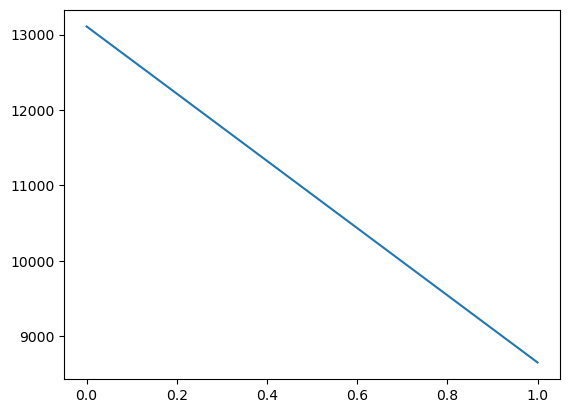

In [10]:
plt.plot(df['Final_decision'].value_counts())

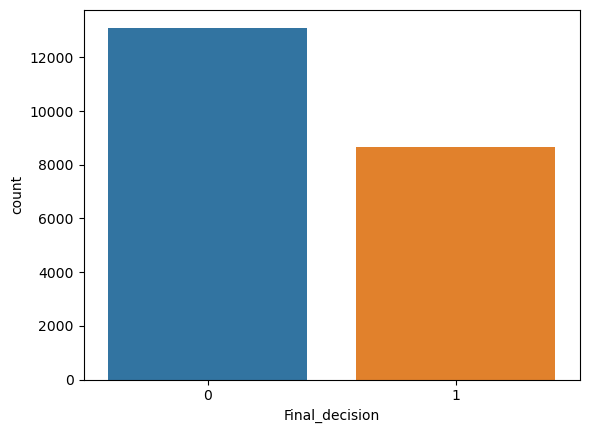

In [11]:
sns.countplot( x = 'Final_decision', data = df );

In [12]:
df['Tweet_Text'] = df['Tweet_Text'].apply(normalize) # To normalize some text, all you need to do pass unicode text. It will return a str with normalized characters both single and combined, proper spaces after digits and punctuations and diacritics(Zabar - Paish) removed.
df['Tweet_Text'] = df['Tweet_Text'].apply(remove_punctuation) # Remove punctuation from text by removing all instances of marks. marks=',;:'
df['Tweet_Text'] = df['Tweet_Text'].apply(remove_accents) # Remove accents from any accented unicode characters in text str, either by transforming them into ascii equivalents or removing them entirely.
df['Tweet_Text'] = df['Tweet_Text'].apply(replace_urls) # Replace all URLs in text str with replace_with str.
df['Tweet_Text'] = df['Tweet_Text'].apply(replace_emails) # Replace all emails in text str with replace_with str.df['comment_text'] = df['comment_text'].apply(replace_numbers) # Replace all numbers in text str with replace_with str.
df['Tweet_Text'] = df['Tweet_Text'].apply(replace_currency_symbols) # Replace all currency symbols in text str with string specified by replace_with str.
df['Tweet_Text'] = df['Tweet_Text'].apply(remove_english_alphabets) # Removes English words and digits from a text
df['Tweet_Text'] = df['Tweet_Text'].apply(normalize_whitespace) ## Given text str, replace one or more spacings with a single space, and one or more linebreaks with a single newline. Also strip leading/trailing whitespace.

In [13]:
from typing import FrozenSet

# Urdu Language Stop words list
STOP_WORDS: FrozenSet[str] = frozenset("""
 آ آئی آئیں آئے آتا آتی آتے آس آمدید آنا آنسہ آنی آنے آپ آگے آہ آہا آیا اب ابھی ابے
 ارے اس اسکا اسکی اسکے اسی اسے اف افوہ البتہ الف ان اندر انکا انکی انکے انہوں انہی انہیں اوئے اور اوپر
 اوہو اپ اپنا اپنوں اپنی اپنے اپنےآپ اکثر اگر اگرچہ اہاہا ایسا ایسی ایسے ایک بائیں بار بارے بالکل باوجود باہر
 بج بجے بخیر بشرطیکہ بعد بعض بغیر بلکہ بن بنا بناؤ بند بڑی بھر بھریں بھی بہت بہتر تاکہ تاہم تب تجھ
 تجھی تجھے ترا تری تلک تم تمام تمہارا تمہاروں تمہاری تمہارے تمہیں تو تک تھا تھی تھیں تھے تیرا تیری تیرے
 جا جاؤ جائیں جائے جاتا جاتی جاتے جانی جانے جب جبکہ جدھر جس جسے جن جناب جنہوں جنہیں جو جہاں جی جیسا
 جیسوں جیسی جیسے حالانکہ حالاں حصہ حضرت خاطر خالی خواہ خوب خود دائیں درمیان دریں دو دوران دوسرا دوسروں دوسری دوں
 دکھائیں دی دیئے دیا دیتا دیتی دیتے دیر دینا دینی دینے دیکھو دیں دیے دے ذریعے رکھا رکھتا رکھتی رکھتے رکھنا رکھنی
 رکھنے رکھو رکھی رکھے رہ رہا رہتا رہتی رہتے رہنا رہنی رہنے رہو رہی رہیں رہے ساتھ سامنے ساڑھے سب سبھی
 سراسر سمیت سوا سوائے سکا سکتا سکتے سہ سہی سی سے شاید شکریہ صاحب صاحبہ صرف ضرور طرح طرف طور علاوہ عین
 فقط فلاں فی قبل قطا لئے لائی لائے لاتا لاتی لاتے لانا لانی لانے لایا لو لوجی لوگوں لگ لگا لگتا
 لگتی لگی لگیں لگے لہذا لی لیا لیتا لیتی لیتے لیکن لیں لیے لے ماسوا مت مجھ مجھی مجھے محترم محترمہ محض
 مرا مرحبا مری مرے مزید مس مسز مسٹر مطابق مل مکرمی مگر مگھر مہربانی میرا میروں میری میرے میں نا نزدیک
 نما نہ نہیں نیز نیچے نے و وار واسطے واقعی والا والوں والی والے واہ وجہ ورنہ وغیرہ ولے وگرنہ وہ وہاں
 وہی وہیں ویسا ویسے ویں پاس پایا پر پس پلیز پون پونی پونے پھر پہ پہلا پہلی پہلے پیر پیچھے چاہئے
 چاہتے چاہیئے چاہے چلا چلو چلیں چلے چناچہ چند چونکہ چکی چکیں چکے ڈالنا ڈالنی ڈالنے ڈالے کئے کا کاش کب کبھی
 کدھر کر کرتا کرتی کرتے کرم کرنا کرنے کرو کریں کرے کس کسی کسے کم کن کنہیں کو کوئی کون کونسا
 کونسے کچھ کہ کہا کہاں کہہ کہی کہیں کہے کی کیا کیسا کیسے کیونکر کیونکہ کیوں کیے کے گئی گئے گا گنا
 گو گویا گی گیا ہائیں ہائے ہاں ہر ہرچند ہرگز ہم ہمارا ہماری ہمارے ہمی ہمیں ہو ہوئی ہوئیں ہوئے ہوا
 ہوبہو ہوتا ہوتی ہوتیں ہوتے ہونا ہونگے ہونی ہونے ہوں ہی ہیلو ہیں ہے یا یات یعنی یک یہ یہاں یہی یہیں
""".split())


def remove_stopwords(text: str):
    return " ".join(word for word in text.split() if word not in STOP_WORDS)

In [14]:
df[['Tweet_Text']].head(10)

,Tweet_Text
0,جو زیادہ بولتے ہیں وہ کام نہیں کرتے اور جو کام...
1,کا ٹرینڈ چلانے والے کا مطلب اور کے فوائد سے وا...
2,جنکی گواہی خود رب کا قرآن دے جنہیں نبی کریم صل...
3,کےبل عمران خان دے سندھ کوٹرانسپورٹ صاف پانی بھ...
4,اب اس ناسور کاخاتمہ ناگریز ہو چکا ہے
5,یقین مانو اللہ تعالی ہم سے ناراض ہیں اتنا نارا...
6,واہ جمیل بھائی آپ نے اپنے فاروقی نام کی لاج رک...
7,ڈاکٹر صاحب کی ٹویٹ کے نیچے دیکھیں
8,پوری دنیا بیماری کا اعلاج تلاش کر رہی ھے پاکست...
9,دوستوں آج آپ نے ٹویٹ کے ساتھ ساتھ ریٹوٹ پر بھی...


In [15]:
df

,Tweet_ID,Tweet_Text,Hammad,Khurram,Final_decision
0,12343,جو زیادہ بولتے ہیں وہ کام نہیں کرتے اور جو کام...,0,0,0
1,6373,کا ٹرینڈ چلانے والے کا مطلب اور کے فوائد سے وا...,0,0,0
2,12555,جنکی گواہی خود رب کا قرآن دے جنہیں نبی کریم صل...,0,0,0
3,19804,کےبل عمران خان دے سندھ کوٹرانسپورٹ صاف پانی بھ...,0,0,0
4,19713,اب اس ناسور کاخاتمہ ناگریز ہو چکا ہے,0,0,0
...,...,...,...,...,...
21754,2886,میرے مطابق ضامن میراثی معافی کی ویڈیومیں کہتا ...,1,1,1
21755,2183,نیز جو شخص اس کے کفر و ارتداد میں شک کرے یا اس...,1,0,1
21756,18150,الحمداللہ اقلیتی کونسل کی سربراہی بتوں کی پرست...,1,0,1
21757,8480,شیعہ کے بعض اصول اور نظریات کو اسلامی معاشروں ...,1,0,1


In [16]:
c=df['Final_decision']
df.rename(columns={'Tweet_Text' : 'text',
                   'Final_decision' : 'category'}, 
                    inplace=True)
a=df['text']
b=df['category'].map({0: 'False', 1: 'True'})

df= pd.concat([a,b,c], axis=1)
df.rename(columns={'Final_decision' : 'label'}, 
                    inplace=True)
df

,text,category,label
0,جو زیادہ بولتے ہیں وہ کام نہیں کرتے اور جو کام...,False,0
1,کا ٹرینڈ چلانے والے کا مطلب اور کے فوائد سے وا...,False,0
2,جنکی گواہی خود رب کا قرآن دے جنہیں نبی کریم صل...,False,0
3,کےبل عمران خان دے سندھ کوٹرانسپورٹ صاف پانی بھ...,False,0
4,اب اس ناسور کاخاتمہ ناگریز ہو چکا ہے,False,0
...,...,...,...
21754,میرے مطابق ضامن میراثی معافی کی ویڈیومیں کہتا ...,True,1
21755,نیز جو شخص اس کے کفر و ارتداد میں شک کرے یا اس...,True,1
21756,الحمداللہ اقلیتی کونسل کی سربراہی بتوں کی پرست...,True,1
21757,شیعہ کے بعض اصول اور نظریات کو اسلامی معاشروں ...,True,1


In [17]:
df.groupby('label').count()

,text,category
label,,
0,13107,13107
1,8652,8652


In [18]:
false, true = np.bincount(df['label'])
total = false + true
print('Examples:\n    Total: {}\n    hate: {} ({:.2f}% of total)\n'.format(
    total, false, 100 * false / total))
print('Examples:\n    Total: {}\n    Ofensive: {} ({:.2f}% of total)\n'.format(
    total, true, 100 * true / total))

Examples:
    Total: 21759
    hate: 13107 (60.24% of total)

Examples:
    Total: 21759
    Ofensive: 8652 (39.76% of total)



In [19]:
X_train_, X_test, y_train_, y_test = train_test_split(
    df.index.values,
    df.label.values,
    test_size=0.10,
    random_state=42,
    stratify=df.label.values,    
)

In [20]:
X_train, X_val, y_train, y_val = train_test_split(
    df.loc[X_train_].index.values,
    df.loc[X_train_].label.values,
    test_size=0.10,
    random_state=42,
    stratify=df.loc[X_train_].label.values,  
)

In [21]:
df['data_type'] = ['not_set']*df.shape[0]
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'
df.loc[X_test, 'data_type'] = 'test'

In [22]:
df.groupby(['category', 'label', 'data_type']).count()

text
category label data_type       
False    0     test        1311
               train      10616
               val         1180
True     1     test         865
               train       7008
               val          779

In [23]:
df

,text,category,label,data_type
0,جو زیادہ بولتے ہیں وہ کام نہیں کرتے اور جو کام...,False,0,train
1,کا ٹرینڈ چلانے والے کا مطلب اور کے فوائد سے وا...,False,0,train
2,جنکی گواہی خود رب کا قرآن دے جنہیں نبی کریم صل...,False,0,train
3,کےبل عمران خان دے سندھ کوٹرانسپورٹ صاف پانی بھ...,False,0,train
4,اب اس ناسور کاخاتمہ ناگریز ہو چکا ہے,False,0,test
...,...,...,...,...
21754,میرے مطابق ضامن میراثی معافی کی ویڈیومیں کہتا ...,True,1,val
21755,نیز جو شخص اس کے کفر و ارتداد میں شک کرے یا اس...,True,1,train
21756,الحمداللہ اقلیتی کونسل کی سربراہی بتوں کی پرست...,True,1,train
21757,شیعہ کے بعض اصول اور نظریات کو اسلامی معاشروں ...,True,1,train


In [24]:
df_train = df.loc[df["data_type"]=="train"]
df_train.head(5)

,text,category,label,data_type
0,جو زیادہ بولتے ہیں وہ کام نہیں کرتے اور جو کام...,False,0,train
1,کا ٹرینڈ چلانے والے کا مطلب اور کے فوائد سے وا...,False,0,train
2,جنکی گواہی خود رب کا قرآن دے جنہیں نبی کریم صل...,False,0,train
3,کےبل عمران خان دے سندھ کوٹرانسپورٹ صاف پانی بھ...,False,0,train
6,واہ جمیل بھائی آپ نے اپنے فاروقی نام کی لاج رک...,False,0,train


In [25]:
df_val = df.loc[df["data_type"]=="val"]
df_val.head(5)

,text,category,label,data_type
10,انسان کی زندگی میں سب سے زیادہ اہمیت کی حامل ج...,False,0,val
25,ہمارا جینا مرنا اپنے پیارے آقا ﷺ کیلئے ہے عقید...,False,0,val
26,حب علی یا بغض معاویہ کی وجہ سے ٹویٹ کرنے والوں...,False,0,val
28,حضرت ابوھریرہ رضی اللہ عنہ روایت کرتے ہیں کہ ن...,False,0,val
29,بھائہ سہہیتو باقی باتیں بعد میں پہلے,False,0,val


In [26]:
df_test = df.loc[df["data_type"]=="test"]
df_test.head(5)

,text,category,label,data_type
4,اب اس ناسور کاخاتمہ ناگریز ہو چکا ہے,False,0,test
5,یقین مانو اللہ تعالی ہم سے ناراض ہیں اتنا نارا...,False,0,test
9,دوستوں آج آپ نے ٹویٹ کے ساتھ ساتھ ریٹوٹ پر بھی...,False,0,test
55,ڈوب جانے خوف ہے جنکو چھوڑ جاٸیں ابھی توبہتر ہے...,False,0,test
64,اس امداد کا تو کسی نے سوچاہی نہ تھا,False,0,test


In [27]:
df.dtypes

text         object
category     object
label         int64
data_type    object
dtype: object

In [28]:
train_ds = tf.data.Dataset.from_tensor_slices((df_train.text.values, df_train.label.values))
val_ds = tf.data.Dataset.from_tensor_slices((df_val.text.values, df_val.label.values))
test_ds = tf.data.Dataset.from_tensor_slices((df_test.text.values, df_test.label.values))


In [29]:
train_ds

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [30]:
train_ds = train_ds.shuffle(len(df_train)).batch(32, drop_remainder=False)
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [31]:
val_ds = val_ds.shuffle(len(df_val)).batch(32, drop_remainder=False)
val_ds

<BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [32]:
test_ds = test_ds.shuffle(len(df_test)).batch(32, drop_remainder=False)
test_ds

<BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [33]:
tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/4'
tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3'
print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/4
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3


In [34]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [35]:
for text_batch, label_batch in train_ds.take(1):
  for i in range(1):
    tweet = text_batch.numpy()[i]
    print(f'Tweet: {text_batch.numpy()[i]}')
    label = label_batch.numpy()[i]
    print(f'Label : {label}')

text_test = ['جنکی گواہی خود رب کا قرآن دے جنہیں نبی کریم صل اللہ علیہ و آلہ و سلم جنت کی بشارت دیں اور آج کچھ چرسی بھنگی اعتراض کریں ہم ان تمام دشمنان صحابہ کرام رضی اللہ عنہ کو جوتے کی نوک پر رکھتے ہیں']
text_test = [tweet]


text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Tweet: b'\xd9\x88\xd8\xb2\xdb\x8c\xd8\xb1 \xd8\xa7\xd8\xb9\xd9\x84\xdb\x8c \xd8\xb3\xd9\x86\xd8\xaf\xda\xbe \xda\xa9\xdb\x8c \xd8\xa8\xd9\x84\xd8\xa7 \xd8\xb3\xdb\x92 \xd8\xaf\xd9\x88\xda\xa9\xd8\xa7\xd9\x86\xd8\xaf\xd8\xa7\xd8\xb1 \xd8\xac\xd8\xa7\xd8\xa6\xdb\x8c\xda\xba \xd8\xa8\xda\xbe\xd8\xa7\xda\x91 \xd9\x85\xdb\x8c\xda\xba'
Label : 1
Keys       : ['input_type_ids', 'input_mask', 'input_word_ids']
Shape      : (1, 128)
Word Ids   : [  101 44556   763 69124 17818 44521 11076 42678 10429 11689 13669 87359]
Input Mask : [1 1 1 1 1 1 1 1 1 1 1 1]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [36]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [37]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/4
Pooled Outputs Shape:(1, 768)
Pooled Outputs Values:[ 0.146252    0.04929201  0.34982944 -0.18985789  0.03380747  0.19671859
  0.15082689  0.08023612 -0.18876359  0.18850105 -0.0052603  -0.00991157]
Sequence Outputs Shape:(1, 128, 768)
Sequence Outputs Values:[[ 0.0864637   0.03770181  0.0174588  ...  0.11237131 -0.02513243
   0.03323346]
 [-0.54455805  0.03473775  0.8217001  ... -0.09372638 -0.36991453
   0.16968277]
 [-0.31201488  0.06463974  0.81884956 ... -0.19306788 -0.41676784
   0.32569224]
 ...
 [ 0.22079329  0.18271047  0.87785655 ...  0.4778839  -0.6724776
   0.02172885]
 [ 0.15212165 -0.27573454 -0.05574593 ... -0.00815344  0.22809158
   0.3145172 ]
 [-0.11045214 -0.41196758  0.1371057  ...  0.19267496 -0.2406458
   0.5177655 ]]


In [38]:
weight_for_0 = (1 / false)*(total)/3.0 
weight_for_1 = (1 / true)*(total)/3.0
#weight_for_2 = (1 / neither)*(total)/3.0


class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))
#print('Weight for class 2: {:.2f}'.format(weight_for_2))

Weight for class 0: 0.55
Weight for class 1: 0.84


In [39]:
initial_output_bias = np.array([3.938462, 15, 5.])
initial_output_bias 

array([ 3.938462, 15.      ,  5.      ])

In [48]:
def build_CNN_classifier_model():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    #net = outputs['pooled_output'] # [batch_size, 768].
    net = sequence_output = outputs["sequence_output"] # [batch_size, seq_length, 768]
      
    
    net = tf.keras.layers.Conv1D(250, (3), activation='relu')(net)
    #net = tf.keras.layers.MaxPooling1D(2)(net)
    
    net = tf.keras.layers.Conv1D(250, (3), activation='relu')(net)
    #net = tf.keras.layers.MaxPooling1D(2)(net)
    net = tf.keras.layers.GlobalMaxPool1D()(net)
    
#    net = tf.keras.layers.Flatten()(net)
    
    net = tf.keras.layers.Dense(250, activation="relu")(net)
    
    net = tf.keras.layers.Dropout(0.2)(net)
#   net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
    net = tf.keras.layers.Dense(3, activation="softmax", name='classifier')(net)
    
    return tf.keras.Model(text_input, net)

In [49]:
cnn_classifier_model = build_CNN_classifier_model()
bert_raw_result = cnn_classifier_model(tf.constant(text_test))
print(tf.sigmoid(bert_raw_result))

tf.Tensor([[0.563118   0.53982705 0.642568  ]], shape=(1, 3), dtype=float32)


In [50]:
text_test

[b'\xd9\x88\xd8\xb2\xdb\x8c\xd8\xb1 \xd8\xa7\xd8\xb9\xd9\x84\xdb\x8c \xd8\xb3\xd9\x86\xd8\xaf\xda\xbe \xda\xa9\xdb\x8c \xd8\xa8\xd9\x84\xd8\xa7 \xd8\xb3\xdb\x92 \xd8\xaf\xd9\x88\xda\xa9\xd8\xa7\xd9\x86\xd8\xaf\xd8\xa7\xd8\xb1 \xd8\xac\xd8\xa7\xd8\xa6\xdb\x8c\xda\xba \xd8\xa8\xda\xbe\xd8\xa7\xda\x91 \xd9\x85\xdb\x8c\xda\xba']

In [51]:
cnn_classifier_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                    

In [52]:
tf.keras.utils.plot_model(cnn_classifier_model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [53]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [54]:
epochs = 2
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

cnn_classifier_model.compile(optimizer=optimizer,
                          loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                          metrics=tf.keras.metrics.SparseCategoricalAccuracy('accuracy'))

In [56]:
print(f'Training model with {tfhub_handle_encoder}')
cnn_history = cnn_classifier_model.fit(x=train_ds,
                                       validation_data=val_ds,
                                       epochs=epochs,
                                       class_weight=class_weight
                                      )

Training model with https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/4
Epoch 1/2
551/551 [==============================] - 21553s 39s/step - loss: 0.2161 - accuracy: 0.8652 - val_loss: 0.3836 - val_accuracy: 0.8387
Epoch 2/2
551/551 [==============================] - 20120s 37s/step - loss: 0.1780 - accuracy: 0.8905 - val_loss: 0.3905 - val_accuracy: 0.8341


In [57]:
loss, accuracy = cnn_classifier_model.evaluate(test_ds)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

68/68 [==============================] - 895s 13s/step - loss: 0.3493 - accuracy: 0.8442
Loss: 0.3492565453052521
Accuracy: 0.8442095518112183


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


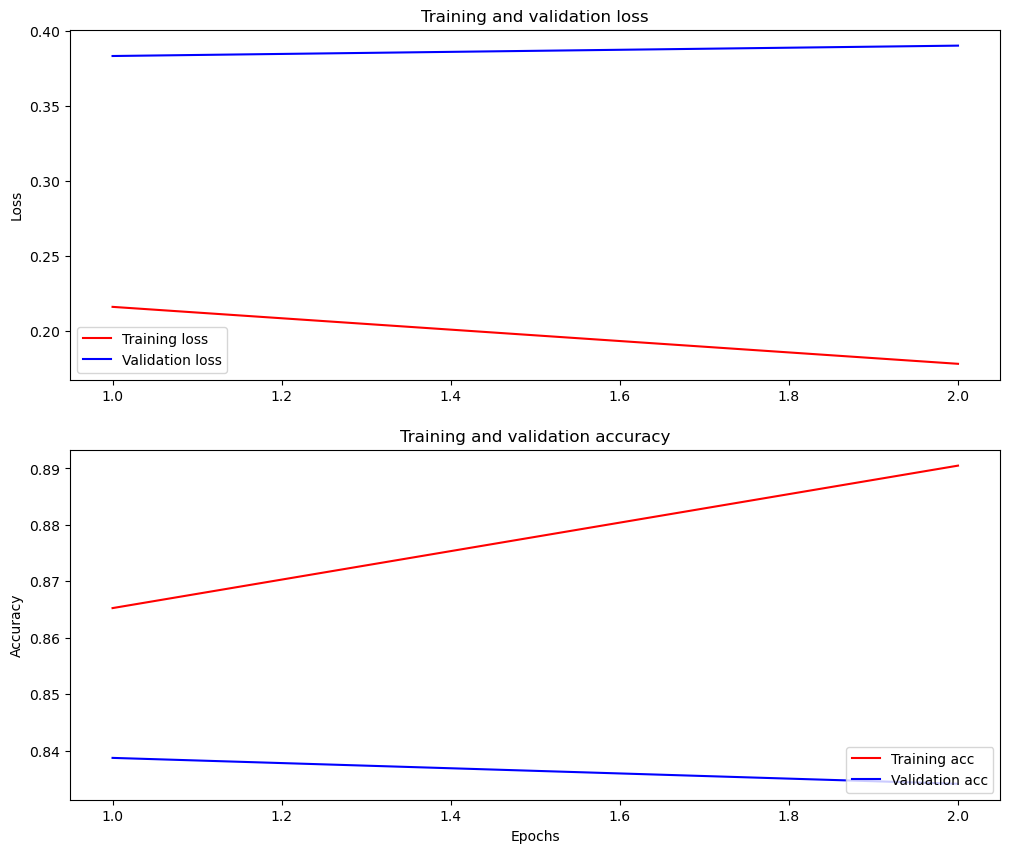

In [58]:
history_dict = cnn_history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
# acc = history_dict['binary_accuracy']
# val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(12, 10))
fig.tight_layout()

plt.subplot(2, 1, 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [59]:
dataset_name = 'New-dataset-BERT-CNN-2epochs-3kernels'
saved_model_path = './{}_bert'.format(dataset_name.replace('/', '_'))

cnn_classifier_model.save(saved_model_path, include_optimizer=False)

In [60]:
reloaded_model = tf.saved_model.load(saved_model_path)

In [61]:
result =  cnn_classifier_model.predict(test_ds)
print(result.shape)

68/68 [==============================] - 835s 12s/step
(2176, 3)


In [62]:
result[0:2]

array([[0.9718156 , 0.02749175, 0.00069272],
       [0.6823197 , 0.31319705, 0.00448334]], dtype=float32)

In [63]:
classes = np.argmax(result, axis=-1)

In [64]:
tweet = []
test_labels = []
predictions = []
for tweet, labels in test_ds.take(-1):
  tweet = tweet.numpy()
  test_labels.append(labels.numpy())
  predictions.append(cnn_classifier_model.predict(tweet))

1/1 [==============================] - 14s 14s/step


In [65]:
test_labels[0:2]

[array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 0, 0, 1, 0, 0, 1], dtype=int64),
 array([1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)]

In [66]:
predictions[0:2]

[array([[0.96374923, 0.03544296, 0.00080791],
        [0.9720544 , 0.02715195, 0.00079369],
        [0.02467565, 0.97441655, 0.00090781],
        [0.6984345 , 0.29847145, 0.003094  ],
        [0.0138512 , 0.98531556, 0.00083319],
        [0.96104026, 0.03824707, 0.00071274],
        [0.98944575, 0.01027084, 0.00028343],
        [0.9067863 , 0.09150556, 0.001708  ],
        [0.8275668 , 0.17009099, 0.00234216],
        [0.91455054, 0.08382813, 0.0016213 ],
        [0.9690139 , 0.03028768, 0.00069844],
        [0.9283195 , 0.07045162, 0.00122878],
        [0.00211111, 0.99725705, 0.00063183],
        [0.41284856, 0.5842414 , 0.00291007],
        [0.00580786, 0.9934628 , 0.00072946],
        [0.9511876 , 0.04784199, 0.00097042],
        [0.45978388, 0.5384053 , 0.00181082],
        [0.74967325, 0.24784836, 0.00247846],
        [0.99642926, 0.00341795, 0.00015273],
        [0.26114205, 0.73690385, 0.0019541 ],
        [0.94243115, 0.05639432, 0.00117448],
        [0.5157962 , 0.48094472, 0

In [67]:
from itertools import chain

In [68]:
flatten_list = list(chain.from_iterable(predictions))
y_pred = np.argmax(flatten_list, axis=-1)

In [69]:
type(y_pred)

numpy.ndarray

In [70]:
y_test = np.array(list(chain.from_iterable(test_labels)))

In [71]:
type(y_test)

numpy.ndarray

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1100,  211],
       [ 134,  731]], dtype=int64)

In [73]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report

In [74]:
print(f'Precision: {precision_score(y_test, y_pred)*100}')

Precision: 77.60084925690022


In [75]:
print(f'Recall: {recall_score(y_test, y_pred)*100}')

Recall: 84.5086705202312


In [76]:
print(f'Accuracy:  {accuracy_score(y_test, y_pred)*100}')

Accuracy:  84.14522058823529


In [77]:
print(f'F1 Score:  {f1_score(y_test, y_pred)*100}')

F1 Score:  80.90758162700608


In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1311
           1       0.78      0.85      0.81       865

    accuracy                           0.84      2176
   macro avg       0.83      0.84      0.84      2176
weighted avg       0.85      0.84      0.84      2176



In [79]:
print(f'F1 Score:  {f1_score(y_test, y_pred, average = "macro")*100}')

F1 Score:  83.67579474277613


In [80]:
print(f'Precision: {precision_score(y_test, y_pred, average = "macro")*100}')

Precision: 83.37092705956842


In [81]:
print(f'Recall: {recall_score(y_test, y_pred, average = "macro")*100}')

Recall: 84.20704311671362


In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1311
           1       0.78      0.85      0.81       865

    accuracy                           0.84      2176
   macro avg       0.83      0.84      0.84      2176
weighted avg       0.85      0.84      0.84      2176

